## Review Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
reviews = pd.read_csv('yelp.csv')

In [3]:
reviews.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


### Exploratory Data Analysis

In [4]:
reviews.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


### Adding a feature of review text length

In [6]:
reviews['text length'] = reviews['text'].apply(len)

### Visualizing the text length and reviews

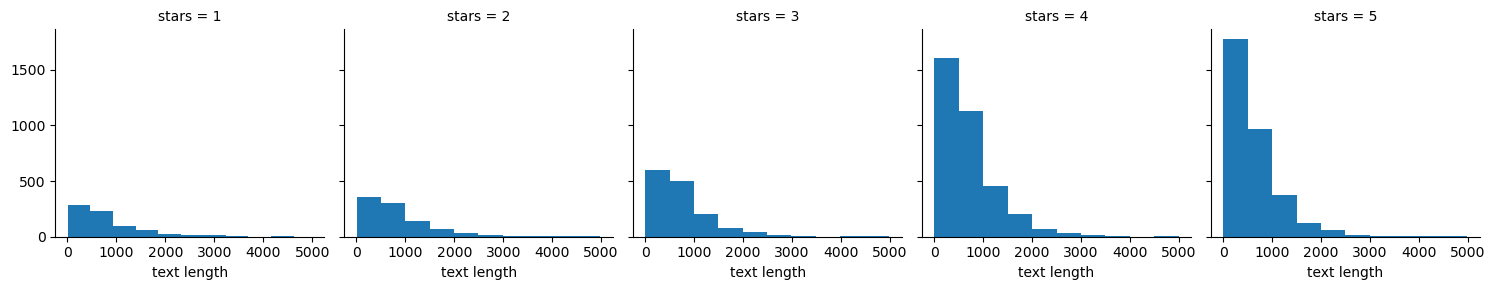

In [7]:
grid = sns.FacetGrid(reviews, col='stars')
grid.map(plt.hist, 'text length')

#### the diagram states that the More length,the high will be rating

<Axes: xlabel='stars', ylabel='count'>

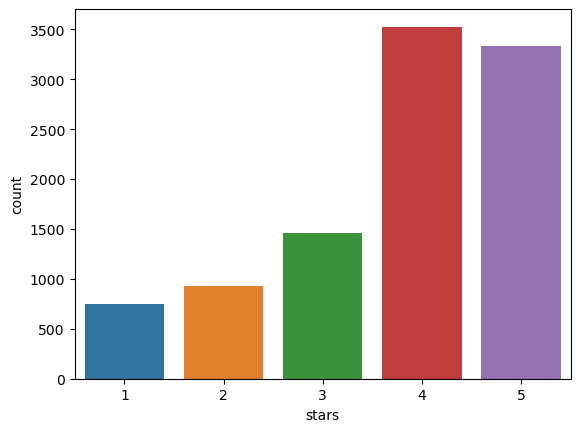

In [8]:
sns.countplot(x='stars', data=reviews)

#### Highest number of reviews are the 4-star reviews following by 5-star reviews.

------------------------

#### As this is review classification based on stars,so text and stars columns are useful only

In [9]:
classes = reviews[(reviews['stars'] == 1) | (reviews['stars'] == 5)]
x = classes['text']
y = classes['stars']

### Text Processing to remove stop words and punctuations

In [10]:
import string
from nltk.corpus import stopwords

def text_processing(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_review = [word for word in review.split() if word.lower() not in stopwords.words('english')]
    
    return clean_review

In [11]:
classes['text'].apply(text_processing)

0       [wife, took, birthday, breakfast, excellent., ...
1       [idea, people, give, bad, reviews, place., goe...
3       [Rosie,, Dakota,, LOVE, Chaparral, Dog, Park!!...
4       [General, Manager, Scott, Petello, good, egg!!...
6       [Drop, drive, here., ate, go, back, next, day,...
                              ...                        
9990    [Yes, rock, hipster, joints., dig, place., lit...
9991    [4, stars?, (A, notes:, folks, rated, place, l...
9992    [I'm, normally, one, jump, reviewing, chain, r...
9994    [Let's, see...what, like, Surprise, Stadium?, ...
9999    [4-5, locations.., 4.5, star, average.., think...
Name: text, Length: 4086, dtype: object

### splitting into train and test data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [14]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(4086,)
(2860,)
(1226,)


In [15]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(4086,)
(2860,)
(1226,)


### Vectorization

In [16]:
vectorizer = TfidfVectorizer()

In [17]:
new_x_train = vectorizer.fit_transform(x_train)
new_x_test = vectorizer.transform(x_test)

In [18]:
print(new_x_train)

  (0, 5332)	0.1833334663422568
  (0, 5668)	0.20322432953667213
  (0, 696)	0.10708097393492826
  (0, 14525)	0.06833310707442071
  (0, 4393)	0.16118217844775795
  (0, 14914)	0.14313892745502305
  (0, 6782)	0.06746780194590937
  (0, 15688)	0.08469007140483381
  (0, 14642)	0.09268680470928307
  (0, 5149)	0.12243872404076495
  (0, 8630)	0.09937891344901742
  (0, 7936)	0.08784734057759222
  (0, 1119)	0.07699638481856348
  (0, 1221)	0.21182922400368934
  (0, 14681)	0.048886251842445286
  (0, 850)	0.1469770023591021
  (0, 14517)	0.08273438854078836
  (0, 7292)	0.08518360183986279
  (0, 8095)	0.11936123358287248
  (0, 4528)	0.1064487934295933
  (0, 11648)	0.10271646790274788
  (0, 11705)	0.12944571149370543
  (0, 6944)	0.15099014033179087
  (0, 8044)	0.22807211963621674
  (0, 959)	0.14822509480735688
  :	:
  (2859, 5146)	0.1285109346064022
  (2859, 842)	0.13445783013541415
  (2859, 13608)	0.12359866229452145
  (2859, 9675)	0.13784744443074673
  (2859, 4089)	0.1297751351012544
  (2859, 9941)	0.1

### Training the Model

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# model = KNeighborsClassifier()
model = RandomForestClassifier()
# model = MultinomialNB()
# model = DecisionTreeClassifier()

In [45]:
model = model.fit(new_x_train, y_train)

### predictions on test data

In [46]:
y_pred = model.predict(new_x_test)

In [47]:
y_pred

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

### Accuracy

In [52]:
print('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.8393148450244698


### Testing the model on a sample review

In [65]:
review = ["DESCRIPTION. The Children's Communication Checklist-Second Edition, United States Edition (CCC-2) is intended for use with children between the ages of 4 years and 16 years, 11 months who have normal hearing, speak in sentences, and use English as their primary language. As a caregiver-completed checklist, the CCC-2 provides a source of pre-assessment information for a child scheduled to be evaluated by a speech-language pathologist (SLP), educational diagnostician, or psychologist for speech and language concerns. In particular, the CCC-2 includes content addressing pragmatics-an aspect of language that is infrequently addressed in most language measures, but is critical for the diagnosis of autism spectrum disorders (ASD). The purposes of the CCC-2 are the identification of pragmatic language impairment, screening of receptive and expressive language skills, and assistance in screening for ASD. In addition to general knowledge of standardized test use, test users should become familiar with the CCC-2 and practice its administration, scoring, and interpretation prior to clinical use. If the child's caregiver is considered unable to provide valid responses, an alternative individual (e.g., a teacher) who has at least 3 months of regular contact with the child is enlisted. Alternatively, the checklist can be given as a guided interview. One potentially confusing feature of checklist completion is that the direction of the 4-point scale used by caregivers is reversed for checklist items reflecting difficulties versus those reflecting strengths. Although this design is clearly stated and intentional on the part of the test publishers, test users will want to insure respondents' compliance with this change in scoring from one section to the next. Specifically, the same scale, 0-3, is used for difficulties and strengths, but a 0 for a difficulty indicates an absence of the difficulty, whereas a 0 for a strength indicates an absence fo the strength. The checklist takes about 10 to 15 minutes to complete. Once completed, the CCC-2 can be scored using a scoring CD in about 5 minutes or a scoring worksheet in about 15 minutes. Both methods result in (a) derived scaled scores and percentile ranks for each scale; (b) a General Communication Composite (GCC) normalized standard score, confidence interval and percentile rank, reflecting the child's performance on the first 8 scales; and (c) the Social Interaction Difference Index (SIDI). The SIDI is intended for descriptive use and is the sum of performances on the scales E, H, I, and J (scales assessing language and nonlanguage features associated with autism) minus the sum of performances on scales A-D (scales associated with knowledge of language structures). Guidelines for administration, scoring, and interpretation are clearly stated in the test manual.DEVELOPMENT. The United States Edition of the CCC-2 is an adaptation of the CCC-2 (Bishop, 2003), which was developed in the United Kingdom. In addition to making changes in spelling and phrasing, the test developers also made minor additions to rating scale descriptors prior to U.S. standardization. The first predecessors to the British version of the CCC-2 (Bishop, 2003) had been developed to identify patterns of language difficulties (especially pragmatic) in children with diagnosed language impairment. These earlier versions first used respondents who were teachers and speech-languages professionals, later shifting to the use of familiar adults as respondents. The British edition of the CCC-2 was modified so that it could be used in diagnosis and has been the focus of ongoing validity studies by a variety of researchers. The CCC-2, United States Edition, is composed of 70 items within ten 7-item scales (A. Speech, B. Syntax, C. Semantics, D. Coherence, E. Initiation, F. Scripted Language, G. Context, H. Nonverbal Communication, I. Social Relations, and J. Interests). Within each scale, 5 items relate to communication difficulties and 2 to strengths. The checklist is structured so that all communication difficulties are evaluated first, then strengths are evaluated. The first four scales (A-D) address aspects of language frequently affected in specific language impairments. The second four scales (E-H) address aspects affected in pragmatic impairments (which can occur independently or along with other language impairments). The last two scales (I-J) address nonlanguage behaviors often associated with autism spectrum disorder (ASD). Findings on the last two sets of scales (Scales E through J) are used as a basis for recommending further assessment for ASD. TECHNICAL. Standardization The development of norms and selected technical studies for the current edition were conducted on a sample of 950 U.S. children. Sample sizes by age were 100 children for each year between 4 years and 9 years, 11 months; 100 children for each 2-year period between 10 years and 13 years, 11 months; and 150 children for the period from 14 years to 16 years, 11 months. These samples are well matched to U.S. Census data from 2002 for race/ethnicity, geographic region, and parent education level. Twenty-seven percent of these children were receiving special services (including 7% for gifted and talented/advanced placement). Although the sample as a whole was evenly divided between boys and girls, scaled scores were not reported by gender for each age group. Normative data were presented at 3-month intervals for ages 4 years to 6 years, 11 months; at 6-month intervals for 7 to 7 years, 11 months; and at 12-month intervals for subsequent ageReliabilityReliability studies examined test-retest reliability and internal consistency. Test-retest reliability was examined for 98 children from the standardization sample in three age groups (4 years to 6 years, 11 months; 7 years to 9 years, 11 months; and 10 years to 16 years, 11 months) composed of at least 30 children each and retested over intervals from 1 to 28 days. Results were good for the youngest age group (r = .86) and excellent for the older two groups (r = .96 and .93, respectively). Coefficient alpha data based on the U.S. standardization data suggest appropriately strong internal consistency for each of the component scales. ValidityChildren with specific-language impairment (SLI) (n = 54), autistic/spectrum disorder (ASD) (n = 62) and pragmatic language impairment (n = 46) were studied to provide validity evidence. As was required for the standardization sample, children in these groups were required to have normal hearing, to have English as their primary language and to speak in sentences. Because many children with ASD do not develop this level of spoken language, the children studied for the CCC-2 seem likely to be more representative of individuals with ASD who are relatively high functioning. The test manual describes three studies examining the construct validity of the CCC-2 and, in particular, its ability to distinguish among clinical samples. First, the test developer compared each clinical group against a matched sample from the standardization data. Multiple t-tests showed significant differences between each clinical group and its matched group on individual scales and on the GCC overall. In a second study, because the SIDI reflects the individual's relative functioning on language structure versus pragmatics, the author predicted differing outcomes across the three groups as well as when each group was compared with a matched control group taken from the standardization sample. Results appeared consistent with predictions. In the third study, the test developer reports the diagnostic accuracy of the GCC in the form of sensitivity and specificity for each group at three criterion levels (1, 1.5, and 2 SD below the mean of the matched samples), as well as the Positive Predictive Power (PPP) and Negative Predictive Power (NPP) for these criterion levels at five different base rates. Although not widely reported for children's language tests, such measures of diagnostic accuracy are increasingly called for and represent a level of detail that can help clinicians assess the likely utility of these measures within their own context (Dollaghan, 2007). Except at the lowest base rate, these data generally suggest that the CCC-2 can prove quite helpful in identifying children who have the clinical conditions for which the test was developed. COMMENTARY Weaknesses in the current evidence base supporting use of the CCC-2 for its intended purposes include a need for interexaminer reliability evidence and a more thorough description of its content relevance and coverage. Nonetheless, evidence concerning test-retest reliability and diagnostic validity is strong, particularly in comparison to competing measures-few of which attempt to address language use (pragmatics) as well as language structure. The minimal time demands this instrument places on respondents and test users is another very attractive feature.SUMMARY: The intended purposes of the CCC-2 are screening for ASD and SLI, as well as the identification of pragmatic impairments in children between 4 and 16 years, 11 months. Given evidence supporting it thus far, clinicians who have access to caregivers or other familiar adults to serve as respondents will probably find this a useful addition to their testing protocol. Although it is not suited to children who are lower functioning (i.e., do not speak in sentences), its efficiency, the clarity of its manual, and its focus on both language structure and use (pragmatics) represent considerable strengths. Because the CCC-2 is the product of a long history of research by the test author and other, independent researchers, it seems likely that additional support related to reliability and further validity evidence may be forthcoming."]

In [66]:
vector = vectorizer.transform(review)

In [67]:
result = int(model.predict(vector))

In [68]:
print(f" The review is classified as {result}-star review")

 The review is classified as 5-star review
